In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Get the project directory path
project_dir = os.getcwd()

# Function to load data and count values in 'onset' column
def load_data_and_count_values(data_dir):
    csv_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.csv')]
    dataframes = {file: pd.read_csv(file) for file in csv_files}
    onset_percentages = {os.path.basename(file): df['onset'].value_counts(normalize=True) for file, df in dataframes.items() if 'onset' in df.columns}
    onset_counts = {os.path.basename(file): df['onset'].value_counts() for file, df in dataframes.items() if 'onset' in df.columns}
    return onset_percentages, onset_counts

# Training data analysis
train_data_dir = os.path.join(project_dir, 'Data', 'train_data')
train_onset_percentages,train_onset_counts = load_data_and_count_values(train_data_dir)

# Test data analysis
test_data_dir = os.path.join(project_dir, 'Data', 'test_data')
test_onset_percentages,test_onset_counts = load_data_and_count_values(test_data_dir)

In [22]:

def plot_onset_distribution(onset_counts, dataset_type):
    fig, ax = plt.subplots()
    # Collecting data for plot
    labels = list(onset_counts.keys())
    train_zeros = [counts.get(0, 0) for counts in onset_counts.values()]
    train_ones = [counts.get(1, 0) for counts in onset_counts.values()]

    x = range(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax.bar(x, train_zeros, width, label='0s')
    rects2 = ax.bar(x, train_ones, width, bottom=train_zeros, label='1s')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Proportions')
    ax.set_title(f'Proportions of Onset Classes in {dataset_type} Data')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend()

    # Adding bar labels with smaller fontsize
    ax.bar_label(rects1, padding=3, fontsize=4)  # Set fontsize here
    ax.bar_label(rects2, padding=3, fontsize=4)  # Set fontsize here

    plt.show()

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_average_distribution(onset_counts, dataset_type):
    # Initialize sums and counters
    total_zeros = 0
    total_ones = 0
    num_files = len(onset_counts)

    # Sum up counts for 0s and 1s across all files
    for counts in onset_counts.values():
        total_zeros += counts.get(0, 0)
        total_ones += counts.get(1, 0)

    # Calculate averages
    avg_zeros = total_zeros / num_files
    avg_ones = total_ones / num_files

    # Data to plot
    labels = ['0s', '1s']
    averages = [avg_zeros, avg_ones]

    # Create bar plot
    fig, ax = plt.subplots()
    bars = ax.bar(labels, averages, color=['blue', 'orange'])

    # Adding text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average Proportion')
    ax.set_title(f'Average Proportions of Onset Classes in {dataset_type} Data')
    ax.bar_label(bars, fmt='%.2f', padding=8)  # Adding numerical labels on bars

    plt.show()


In [10]:
# Print the results
sum_train_0 = 0
sum_train_1 = 0
sum_test_0 = 0
sum_test_1 = 0
print("Training Data Onset Counts:")
for file, counts in train_onset_counts.items():
    print(f"{file}:")
    print(counts)
    sum_train_0 += counts[0]
    sum_train_1 += counts[1]
    print()

Training Data Onset Counts:
Haslebuskane_angry_start_end_spect_target.csv:
onset
0    17129
1      532
Name: count, dtype: int64

Haslebuskane_happy_start_end_spect_target.csv:
onset
0    17358
1      539
Name: count, dtype: int64

Haslebuskane_original_start_end_spect_target.csv:
onset
0    18421
1      539
Name: count, dtype: int64

Haslebuskane_sad_start_end_spect_target.csv:
onset
0    20317
1      545
Name: count, dtype: int64

Haslebuskane_tender_start_end_spect_target.csv:
onset
0    18965
1      541
Name: count, dtype: int64

Havbrusen_angry_start_end_spect_target.csv:
onset
0    33525
1      747
Name: count, dtype: int64

Havbrusen_happy_start_end_spect_target.csv:
onset
0    33147
1      744
Name: count, dtype: int64

Havbrusen_original_start_end_spect_target.csv:
onset
0    35498
1      749
Name: count, dtype: int64

Havbrusen_sad_start_end_spect_target.csv:
onset
0    39111
1      769
Name: count, dtype: int64

Havbrusen_tender_start_end_spect_target.csv:
onset
0    37591
1

In [11]:
print("Test Data Onset Counts:")
for file, counts in test_onset_counts.items():
    print(f"{file}:")
    print(counts)
    sum_test_0 += counts[0]
    sum_test_1 += counts[1]
    print()

Test Data Onset Counts:
Silkjegulen_angry_start_end_spect_target.csv:
onset
0    21626
1      539
Name: count, dtype: int64

Silkjegulen_happy_start_end_spect_target.csv:
onset
0    21492
1      536
Name: count, dtype: int64

Silkjegulen_original_start_end_spect_target.csv:
onset
0    23142
1      539
Name: count, dtype: int64

Silkjegulen_sad_start_end_spect_target.csv:
onset
0    24352
1      546
Name: count, dtype: int64

Silkjegulen_tender_start_end_spect_target.csv:
onset
0    23195
1      545
Name: count, dtype: int64

Valdresspringar_angry_start_end_spect_target.csv:
onset
0    15000
1      332
Name: count, dtype: int64

Valdresspringar_happy_start_end_spect_target.csv:
onset
0    15163
1      341
Name: count, dtype: int64

Valdresspringar_original_start_end_spect_target.csv:
onset
0    14840
1      320
Name: count, dtype: int64

Valdresspringar_sad_start_end_spect_target.csv:
onset
0    16212
1      326
Name: count, dtype: int64

Valdresspringar_tender_start_end_spect_target.cs

In [12]:
print(f"Training Data Total Not Onset Counts:", sum_train_0)
print(f"Training Data Total Onset Counts:", sum_train_1)
print(f"Test Data Total Not Onset Counts:", sum_test_0)
print(f"Test Data Total Onset Counts:", sum_test_1)

Training Data Total Not Onset Counts: 538539
Training Data Total Onset Counts: 11897
Test Data Total Not Onset Counts: 324293
Test Data Total Onset Counts: 6732


In [13]:
# Print the results
sum_train_p_0 = 0
sum_train_p_1 = 0
sum_test_p_0 = 0
sum_test_p_1 = 0
print("Training Data Onset Counts:")
for file, counts in train_onset_counts.items():
    print(f"{file}:")
    print(counts)
    sum_train_p_0 += counts[0]
    sum_train_p_1 += counts[1]
    print()

Training Data Onset Counts:
Haslebuskane_angry_start_end_spect_target.csv:
onset
0    17129
1      532
Name: count, dtype: int64

Haslebuskane_happy_start_end_spect_target.csv:
onset
0    17358
1      539
Name: count, dtype: int64

Haslebuskane_original_start_end_spect_target.csv:
onset
0    18421
1      539
Name: count, dtype: int64

Haslebuskane_sad_start_end_spect_target.csv:
onset
0    20317
1      545
Name: count, dtype: int64

Haslebuskane_tender_start_end_spect_target.csv:
onset
0    18965
1      541
Name: count, dtype: int64

Havbrusen_angry_start_end_spect_target.csv:
onset
0    33525
1      747
Name: count, dtype: int64

Havbrusen_happy_start_end_spect_target.csv:
onset
0    33147
1      744
Name: count, dtype: int64

Havbrusen_original_start_end_spect_target.csv:
onset
0    35498
1      749
Name: count, dtype: int64

Havbrusen_sad_start_end_spect_target.csv:
onset
0    39111
1      769
Name: count, dtype: int64

Havbrusen_tender_start_end_spect_target.csv:
onset
0    37591
1

In [17]:
print("Test Data Onset Counts:")
for file, counts in test_onset_percentages.items():
    print(f"{file}:")
    print(counts)
    sum_test_p_0 += counts[0]
    sum_test_p_1 += counts[1]
    print()

Test Data Onset Counts:
Silkjegulen_angry_start_end_spect_target.csv:
onset
0    0.975682
1    0.024318
Name: proportion, dtype: float64

Silkjegulen_happy_start_end_spect_target.csv:
onset
0    0.975667
1    0.024333
Name: proportion, dtype: float64

Silkjegulen_original_start_end_spect_target.csv:
onset
0    0.977239
1    0.022761
Name: proportion, dtype: float64

Silkjegulen_sad_start_end_spect_target.csv:
onset
0    0.978071
1    0.021929
Name: proportion, dtype: float64

Silkjegulen_tender_start_end_spect_target.csv:
onset
0    0.977043
1    0.022957
Name: proportion, dtype: float64

Valdresspringar_angry_start_end_spect_target.csv:
onset
0    0.978346
1    0.021654
Name: proportion, dtype: float64

Valdresspringar_happy_start_end_spect_target.csv:
onset
0    0.978006
1    0.021994
Name: proportion, dtype: float64

Valdresspringar_original_start_end_spect_target.csv:
onset
0    0.978892
1    0.021108
Name: proportion, dtype: float64

Valdresspringar_sad_start_end_spect_target.csv:

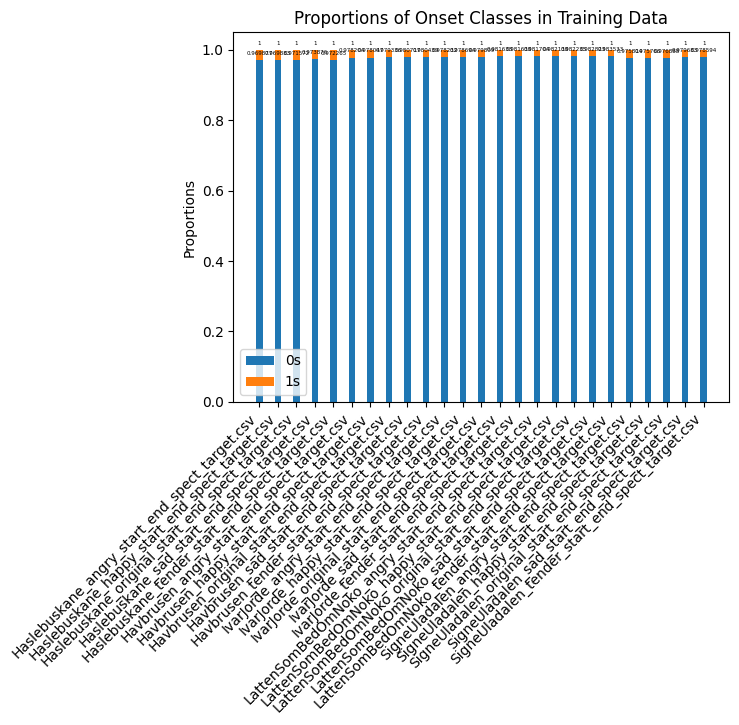

In [23]:

# Visualizing the distributions
plot_onset_distribution(train_onset_percentages, "Training")

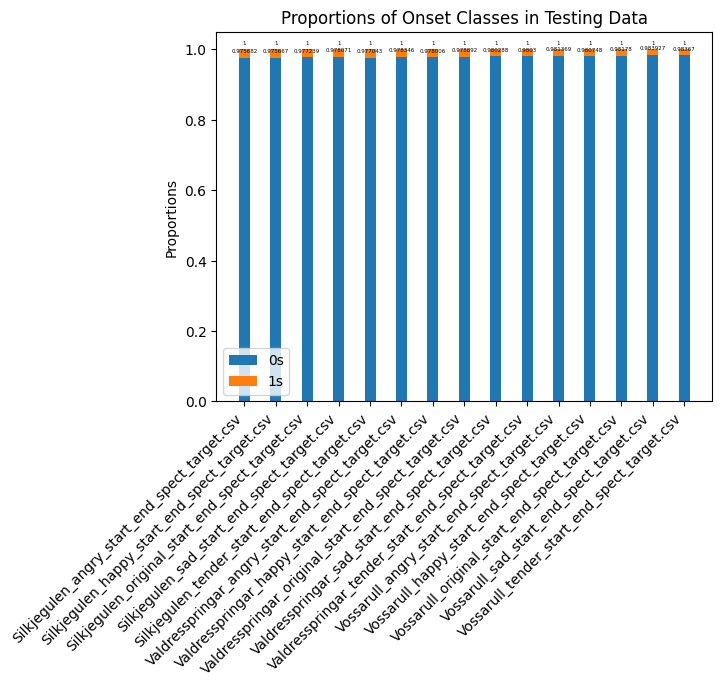

In [24]:

plot_onset_distribution(test_onset_percentages, "Testing")


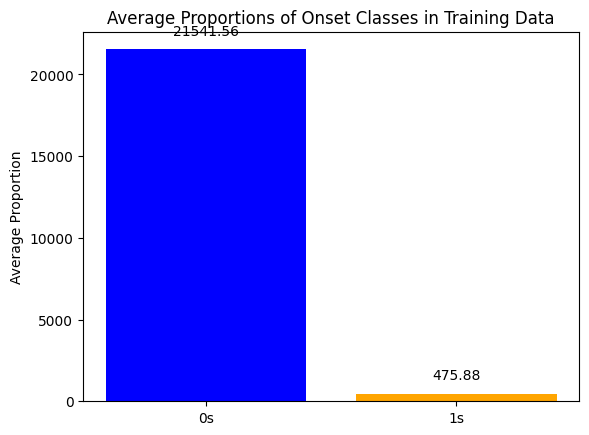

In [26]:
plot_average_distribution(train_onset_counts, "Training")

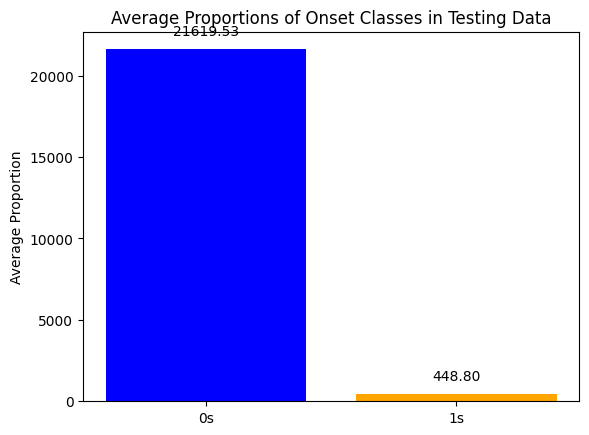

In [27]:
plot_average_distribution(test_onset_counts, "Testing")